In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/train2.csv')

In [3]:
df

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BF0F5D1852,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
1,2CA3A78FEA9,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
2,2C586661A56,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
3,2C1C97E4EC4,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
4,2C463B5FB4C,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
...,...,...,...,...,...,...,...,...
446102,2CC607FAE25,106.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,15.96
446103,2BE6DC4FF9D,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98
446104,2C60F8DFD12,106.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,15.96
446105,2A0970C954B,231.0,1.0,Standard,Delivery from Collection Point,8.5,0.0,10.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446107 entries, 0 to 446106
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MAGIC_KEY        446107 non-null  object 
 1   BOX_ID           446107 non-null  float64
 2   BOX_COUNT        446107 non-null  float64
 3   QUALITY          446107 non-null  object 
 4   DELIVERY_OPTION  446107 non-null  object 
 5   MILK             446107 non-null  float64
 6   MEAT             446107 non-null  float64
 7   UNIT_PRICE       446107 non-null  float64
dtypes: float64(5), object(3)
memory usage: 27.2+ MB


In [5]:
df.head()

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BF0F5D1852,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
1,2CA3A78FEA9,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
2,2C586661A56,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
3,2C1C97E4EC4,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
4,2C463B5FB4C,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #creating an instance of that encoder

In [7]:
rank = ['Standard', 'Premium'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['QUALITY'] = oe.fit_transform(df[['QUALITY']]) #encoding the column

In [8]:
rank = ['Home Delivery - Digital Payment', 'Home Delivery - CoD', 'Delivery from Collection Point'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['DELIVERY_OPTION'] = oe.fit_transform(df[['DELIVERY_OPTION']]) #encoding the column

In [9]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [10]:
df_encoded.head()

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,162.0,1.0,1.0,2.0,10.0,2.2,23.98,180376
1,162.0,1.0,1.0,2.0,10.0,2.2,23.98,345963
2,162.0,1.0,1.0,2.0,10.0,2.2,23.98,277885
3,162.0,1.0,1.0,2.0,10.0,2.2,23.98,226255
4,162.0,1.0,1.0,2.0,10.0,2.2,23.98,265991


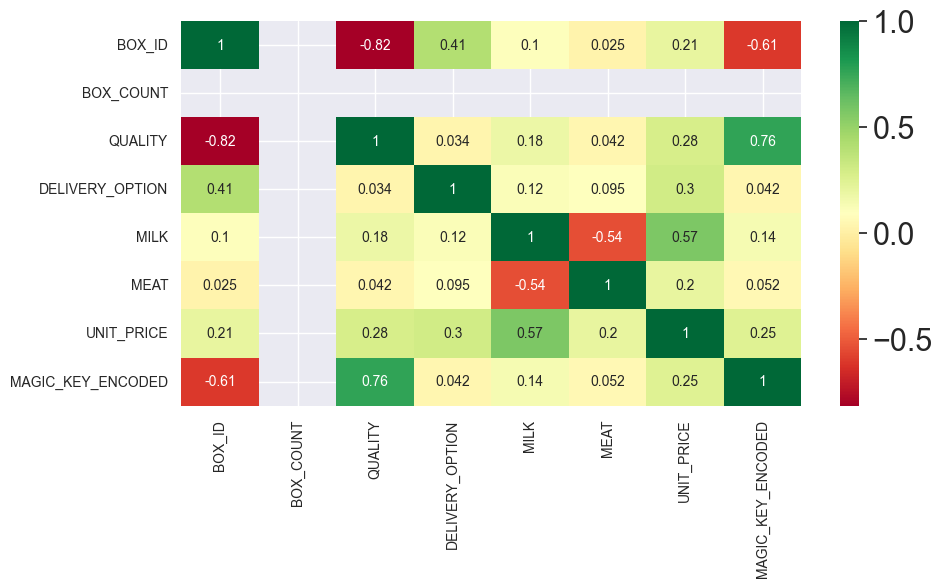

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['BOX_ID'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

BOX_ID               1.000000
DELIVERY_OPTION      0.406627
UNIT_PRICE           0.205224
MILK                 0.104540
MEAT                 0.024811
MAGIC_KEY_ENCODED   -0.606933
QUALITY             -0.816358
BOX_COUNT                 NaN


In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
102155,77.0,1.0,1.0,2.0,0.0,2.5,11.96,225148
200485,41.0,1.0,1.0,1.0,12.0,2.2,19.98,338841
131032,89.0,1.0,1.0,2.0,10.0,0.0,12.18,300677
272681,174.0,1.0,1.0,2.0,18.0,2.9,23.98,409947
227682,268.0,1.0,0.0,2.0,12.0,1.8,19.98,89927
...,...,...,...,...,...,...,...,...
357186,31.0,1.0,1.0,1.0,8.0,1.3,15.98,349551
295235,15.0,1.0,1.0,1.0,9.0,1.6,12.98,362121
366829,132.0,1.0,1.0,2.0,9.0,1.8,19.98,250647
80745,272.0,1.0,0.0,2.0,16.0,2.2,19.98,57504


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,77.0,1.0,1.0,2.0,0.0,2.5,11.96,225148
1,41.0,1.0,1.0,1.0,12.0,2.2,19.98,338841
2,89.0,1.0,1.0,2.0,10.0,0.0,12.18,300677
3,174.0,1.0,1.0,2.0,18.0,2.9,23.98,409947
4,268.0,1.0,0.0,2.0,12.0,1.8,19.98,89927
...,...,...,...,...,...,...,...,...
446102,31.0,1.0,1.0,1.0,8.0,1.3,15.98,349551
446103,15.0,1.0,1.0,1.0,9.0,1.6,12.98,362121
446104,132.0,1.0,1.0,2.0,9.0,1.8,19.98,250647
446105,272.0,1.0,0.0,2.0,16.0,2.2,19.98,57504


In [15]:
X = rearranged_df.drop(columns = ['BOX_ID']) #dropping the class collumn to separate the feature
X

,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,1.0,1.0,2.0,0.0,2.5,11.96,225148
1,1.0,1.0,1.0,12.0,2.2,19.98,338841
2,1.0,1.0,2.0,10.0,0.0,12.18,300677
3,1.0,1.0,2.0,18.0,2.9,23.98,409947
4,1.0,0.0,2.0,12.0,1.8,19.98,89927
...,...,...,...,...,...,...,...
446102,1.0,1.0,1.0,8.0,1.3,15.98,349551
446103,1.0,1.0,1.0,9.0,1.6,12.98,362121
446104,1.0,1.0,2.0,9.0,1.8,19.98,250647
446105,1.0,0.0,2.0,16.0,2.2,19.98,57504


In [16]:
y =  rearranged_df['BOX_ID'] #separating target to y
y

0          77.0
1          41.0
2          89.0
3         174.0
4         268.0
          ...  
446102     31.0
446103     15.0
446104    132.0
446105    272.0
446106    106.0
Name: BOX_ID, Length: 446107, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [18]:
print(len(X_train)) #checking
print(len(X_test))

356885
89222


In [19]:
print(len(y_train)) #checking
print(len(y_test))

356885
89222


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.        , 0.10156039, 0.0890412 , 0.25864151, 0.19689337,
       0.35386353, 0.        ])

In [42]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [43]:
y_pred = tree_clf.predict(X_test)

In [44]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9999887920019727

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
maxdepth = range(1, 31)
scores = []
for d in maxdepth:
    dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

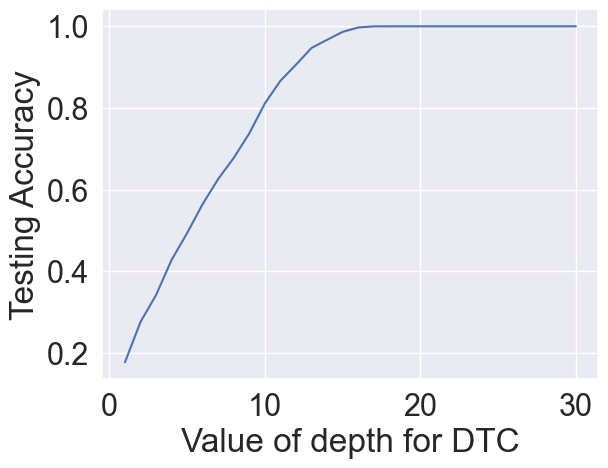

In [27]:
import matplotlib.pyplot as plt #importing marplotlib
#for showing inline
%matplotlib inline 


plt.plot(maxdepth, scores) #defining axis

plt.xlabel("Value of depth for DTC") #labeling the x-axis
plt.ylabel("Testing Accuracy") #labeling the y-axis

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 42, n_jobs = -1, max_leaf_nodes = 2**20, max_features = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=3,
                       max_leaf_nodes=1048576, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.9999775840039452

In [31]:
df_feb = pd.read_csv('../Datasets/test2.csv')

In [32]:
df_feb

,MAGIC_KEY,BOX_ID
0,2955110718F,238.0
1,2C8636FC9B1,80.0
2,2CCA8BBF9F8,80.0
3,2BF7A8F68A8,8.0
4,2BE010F5FC8,8.0
...,...,...
69664,2BF8AD2D6A2,119.0
69665,2BD71F1F17A,118.0
69666,2CC79B51851,118.0
69667,2C4DED6781E,118.0


In [33]:
df = df.drop(columns = ['BOX_ID'])
df

,MAGIC_KEY,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,2BF0F5D1852,1.0,1.0,2.0,10.0,2.2,23.98,180376
1,2CA3A78FEA9,1.0,1.0,2.0,10.0,2.2,23.98,345963
2,2C586661A56,1.0,1.0,2.0,10.0,2.2,23.98,277885
3,2C1C97E4EC4,1.0,1.0,2.0,10.0,2.2,23.98,226255
4,2C463B5FB4C,1.0,1.0,2.0,10.0,2.2,23.98,265991
...,...,...,...,...,...,...,...,...
446102,2CC607FAE25,1.0,1.0,2.0,0.0,3.3,15.96,384036
446103,2BE6DC4FF9D,1.0,1.0,2.0,10.0,1.8,19.98,170134
446104,2C60F8DFD12,1.0,1.0,2.0,0.0,3.3,15.96,284008
446105,2A0970C954B,1.0,0.0,2.0,8.5,0.0,10.14,117706


In [34]:
df_test = pd.merge(df_feb, df, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,2955110718F,238.0,1.0,0.0,2.0,10.0,0.0,12.18,92046
1,2C8636FC9B1,80.0,1.0,1.0,2.0,0.0,2.7,11.96,315999
2,2CCA8BBF9F8,80.0,1.0,1.0,2.0,0.0,2.7,11.96,388878
3,2BF7A8F68A8,8.0,1.0,1.0,1.0,10.0,0.0,12.18,187783
4,2BE010F5FC8,8.0,1.0,1.0,1.0,10.0,0.0,12.18,159250
...,...,...,...,...,...,...,...,...,...
69664,2BF8AD2D6A2,119.0,1.0,1.0,2.0,8.0,1.3,15.98,188930
69665,2BD71F1F17A,118.0,1.0,1.0,2.0,8.0,1.3,15.98,146830
69666,2CC79B51851,118.0,1.0,1.0,2.0,8.0,1.3,15.98,385866
69667,2C4DED6781E,118.0,1.0,1.0,2.0,0.0,3.6,15.96,270277


In [35]:
df_test = df_test.drop(columns = ['MAGIC_KEY'])
df_test

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,238.0,1.0,0.0,2.0,10.0,0.0,12.18,92046
1,80.0,1.0,1.0,2.0,0.0,2.7,11.96,315999
2,80.0,1.0,1.0,2.0,0.0,2.7,11.96,388878
3,8.0,1.0,1.0,1.0,10.0,0.0,12.18,187783
4,8.0,1.0,1.0,1.0,10.0,0.0,12.18,159250
...,...,...,...,...,...,...,...,...
69664,119.0,1.0,1.0,2.0,8.0,1.3,15.98,188930
69665,118.0,1.0,1.0,2.0,8.0,1.3,15.98,146830
69666,118.0,1.0,1.0,2.0,8.0,1.3,15.98,385866
69667,118.0,1.0,1.0,2.0,0.0,3.6,15.96,270277


In [36]:
df_test_X = df_test.drop(columns = ['BOX_ID'])
df_test_X

,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,1.0,0.0,2.0,10.0,0.0,12.18,92046
1,1.0,1.0,2.0,0.0,2.7,11.96,315999
2,1.0,1.0,2.0,0.0,2.7,11.96,388878
3,1.0,1.0,1.0,10.0,0.0,12.18,187783
4,1.0,1.0,1.0,10.0,0.0,12.18,159250
...,...,...,...,...,...,...,...
69664,1.0,1.0,2.0,8.0,1.3,15.98,188930
69665,1.0,1.0,2.0,8.0,1.3,15.98,146830
69666,1.0,1.0,2.0,8.0,1.3,15.98,385866
69667,1.0,1.0,2.0,0.0,3.6,15.96,270277


In [37]:
df_test_y = df_test['BOX_ID']
df_test_y

0        238.0
1         80.0
2         80.0
3          8.0
4          8.0
         ...  
69664    119.0
69665    118.0
69666    118.0
69667    118.0
69668     90.0
Name: BOX_ID, Length: 69669, dtype: float64

In [45]:
y_pred = tree_clf.predict(df_test_X)
y_pred

array([233.,  78.,  78., ..., 118., 108.,  89.])

In [46]:
metrics.accuracy_score(df_test_y, y_pred)

0.40271856923452326

In [40]:
y_pred = classifier.predict(df_test_X)
y_pred

array([233.,  78.,  78., ..., 118., 108.,  89.])

In [41]:
metrics.accuracy_score(df_test_y, y_pred)

0.40271856923452326